<a href="https://colab.research.google.com/github/mrdbcse/deep-learning-pytorch/blob/master/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

* Link: https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
!nvidia-smi

Wed Feb 19 14:05:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             49W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
import torch
from torch import nn # These are the basic building blocks for graphs (nural network)
import matplotlib.pyplot as plt


# torch version
torch.__version__

'2.5.1+cu124'

### Data preparing and Loading

In [4]:
# 1. Linear regression
# formula: y = a + bx

weight = 0.7 # b
bias = 0.3 # a

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

In [6]:
# create a train/ test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Data Visualization


In [29]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # testing data
  plt.scatter(test_data, test_labels, c="r", s=4, label="Training Data")

  # plot predictions
  if predictions:
    plt.scatter(test_data, predictions, c="y", s=4, label="Predictions")

  # legends
  plt.legend(prop={"size": 14})

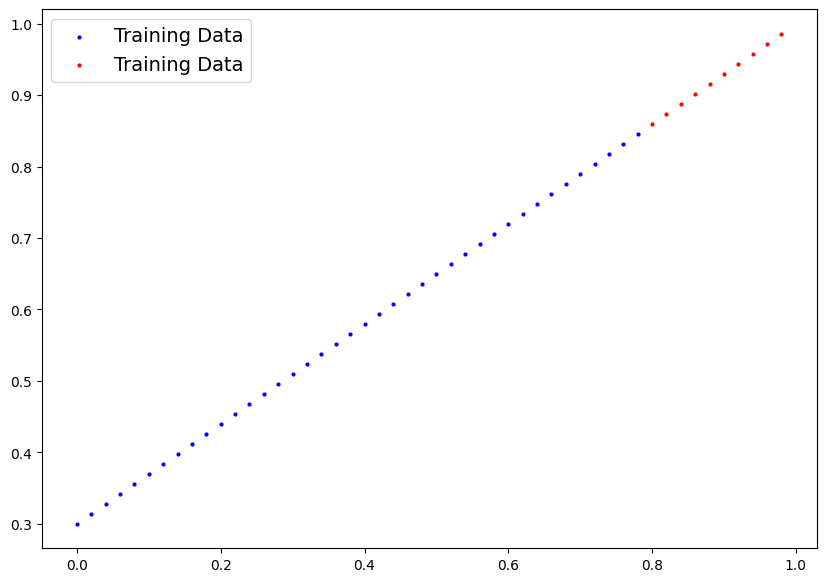

In [30]:
plot_predictions()

### Building PyTorch Model


In [31]:
from torch import nn

# create a linear regression model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias
